In [9]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

In [10]:
net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|████████████████████████████████████████████████████████████████████████| 131497/131497 [00:46<00:00, 2839.67KB/s]


In [11]:
im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path='biking.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

100%|███████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 797.33KB/s]


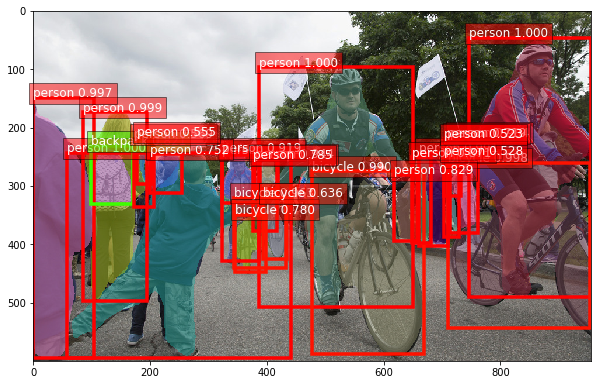

In [12]:
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()